# Decesion Tree Data Group

In [26]:
import warnings
warnings.filterwarnings('ignore')


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
data_group = pd.read_csv('data_group.csv')

In [29]:
data_group.head(10)

,Married/Single,Profession_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,City_State,Risk_Flag
0,1.0,6.0,2.0,0.0,0.0,1.0,3.0,7.0,0
1,1.0,6.0,1.0,0.0,1.0,2.0,3.0,7.0,0
2,0.0,6.0,0.0,0.0,0.0,1.0,2.0,6.0,0
3,1.0,6.0,1.0,0.0,0.0,0.0,0.0,4.0,1
4,1.0,5.0,1.0,0.0,1.0,1.0,2.0,6.0,1
5,1.0,5.0,0.0,0.0,0.0,0.0,3.0,7.0,0
6,0.0,5.0,0.0,0.0,1.0,2.0,2.0,6.0,0
7,1.0,2.0,2.0,0.0,0.0,0.0,3.0,7.0,0
8,1.0,5.0,2.0,0.0,1.0,2.0,3.0,7.0,0
9,1.0,6.0,2.0,0.0,1.0,1.0,1.0,5.0,0


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier


def eval_classification_dt1(model1):
    y1_pred_dt = model1.predict(x1_test_dt)
    y1_pred_train_dt = model1.predict(x1_train_dt)
    y1_pred_proba_dt = model1.predict_proba(x1_test_dt)
    y1_pred_proba_train_dt = model1.predict_proba(x1_train_dt)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y1_test_dt, y1_pred_dt))
    print("Precision (Test Set): %.2f" % precision_score(y1_test_dt, y1_pred_dt))
    print("Recall (Test Set): %.2f" % recall_score(y1_test_dt, y1_pred_dt))
    print("F1-Score (Test Set): %.2f" % f1_score(y1_test_dt, y1_pred_dt))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y1_test_dt, y1_pred_proba_dt[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y1_train_dt, y1_pred_proba_train_dt[:, 1]))
    
    score = cross_validate(RandomForestClassifier(), x1_dt, y1_dt, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): ' + str(score['train_score'].mean()))
    print('roc_auc (crossval test): ' + str(score['test_score'].mean()))

## Modeling menggunakan Decesion Tree

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Kolom-kolom yangdi-drop
features_to_drop = ['Income_Group']

# Membuat salinan data tanpa fitur kategori
dt1_model = data_group.drop(features_to_drop, axis=1)

# Memisahkan fitur dan target
x1_dt = dt1_model.drop('Risk_Flag', axis=1)
y1_dt = dt1_model['Risk_Flag']

# Membagi data menjadi data latih dan data uji
x1_train_dt, x1_test_dt, y1_train_dt, y1_test_dt = train_test_split(
    x1_dt, y1_dt, test_size=0.2, random_state=29)

# Membangun model Decision Tree
dt_1 = DecisionTreeClassifier()
dt_1.fit(x1_train_dt, y1_train_dt)

# Evaluasi model
eval_classification_dt1(dt_1)


Accuracy (Test Set): 0.65
Precision (Test Set): 0.63
Recall (Test Set): 0.74
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.73
roc_auc (crossval train): 0.7336621036219613
roc_auc (crossval test): 0.7235685290375814


## Hyperparameter Tuning

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# List of hyperparameters
hyperparameters = {
    'max_depth': [int(x) for x in np.linspace(1, 110, num=30)],
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 4, 10, 20, 50],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Inisialisasi model Decision Tree
dt_1 = DecisionTreeClassifier(random_state=29)

# Randomized Search untuk hyperparameter tuning
model1 = RandomizedSearchCV(dt_1, hyperparameters, cv=5, scoring='precision', n_jobs=-1)
model1.fit(x1_train_dt, y1_train_dt)

# Prediksi & Evaluasi
y1_pred_dt = model1.predict(x1_test_dt)
eval_classification_dt1(model1)


Accuracy (Test Set): 0.65
Precision (Test Set): 0.63
Recall (Test Set): 0.74
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.73
roc_auc (crossval train): 0.733665766847534
roc_auc (crossval test): 0.7236178493417916


param value: 1; train: 0.7332063359356311; test: 0.7286999962172784
param value: 2; train: 0.7322797123595035; test: 0.7282960060135201
param value: 3; train: 0.731388971291038; test: 0.7273978386827621
param value: 4; train: 0.730379303159655; test: 0.7265385422150932
param value: 5; train: 0.729482198160688; test: 0.7258516292189717
param value: 6; train: 0.728591332729225; test: 0.7253323252265613
param value: 7; train: 0.7280860455023654; test: 0.72514340847105
param value: 8; train: 0.7274583922677983; test: 0.7247790973298567
param value: 9; train: 0.7269869165008122; test: 0.7243274561149322
param value: 10; train: 0.7264948788517259; test: 0.72418965452135
param value: 11; train: 0.7262745969695161; test: 0.7239997437674962
param value: 12; train: 0.7259644267123337; test: 0.7238424025823992
param value: 13; train: 0.7256603657734093; test: 0.7236294256414695
param value: 14; train: 0.7254183380573678; test: 0.7234384407859054
param value: 15; train: 0.7252233735063405; test: 0

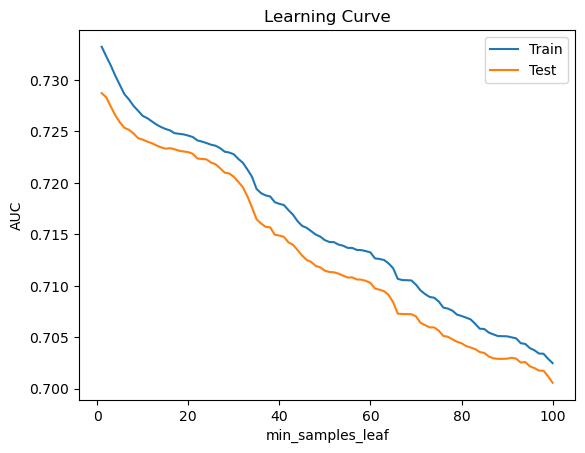

In [33]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt


def draw_learning_curve_dt1(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model1 = DecisionTreeClassifier(min_samples_leaf=i)
        model1.fit(x1_train_dt, y1_train_dt)

        # eval on train
        y1_pred_train_proba_dt = model1.predict_proba(x1_train_dt)
        train_auc = roc_auc_score(y1_train_dt, y1_pred_train_proba_dt[:, 1])
        train_scores.append(train_auc)

        # eval on test
        y1_pred_proba_dt = model1.predict_proba(x1_test_dt)
        test_auc = roc_auc_score(y1_test_dt, y1_pred_proba_dt[:, 1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()


param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve_dt1(param_values)

## Fitur Impportance

In [34]:
def show_feature_importance_dt1(model1):
    feat_importances = pd.Series(model1.feature_importances_, index=x1_dt.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')


def show_best_hyperparameter_dt1(model1):
    print(model1.best_estimator_.get_params())

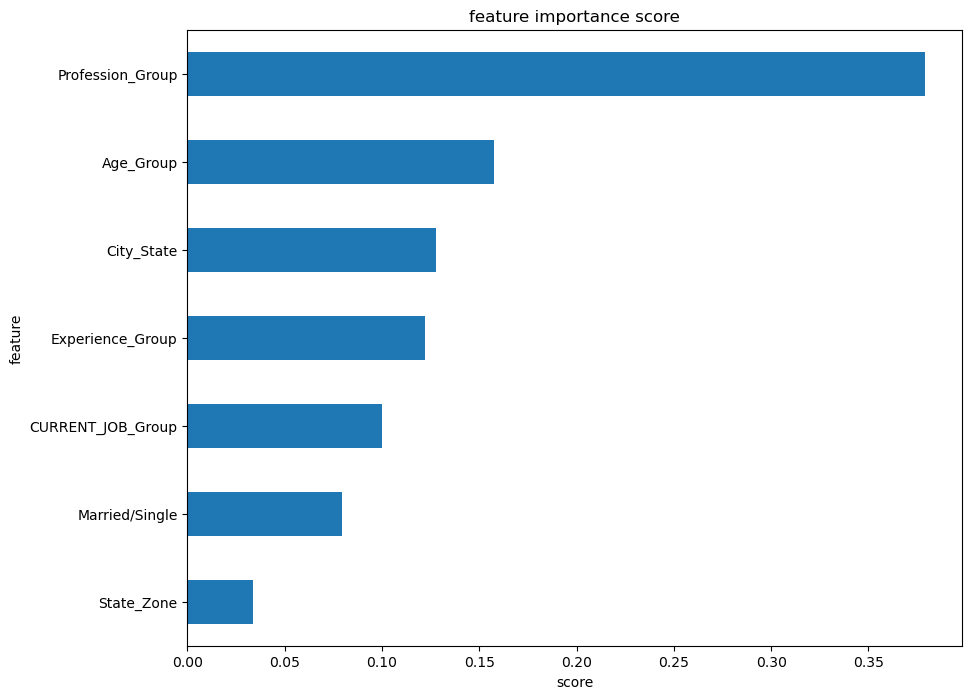

In [35]:
show_feature_importance_dt1(model1.best_estimator_)

# Decesion Tree Data Mentah

In [36]:
data_mentah= pd.read_csv('data_mentah.csv')

In [37]:
data_mentah.head(10)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,Risk_Flag
0,0.129487,0.034483,0.15,0.214286,0.75,1.0,2.0,0.0,33.0,251.0,13.0,0
1,0.757206,0.327586,0.50,0.642857,0.75,1.0,2.0,0.0,43.0,227.0,14.0,0
2,0.398564,0.775862,0.20,0.285714,0.00,0.0,2.0,0.0,47.0,8.0,12.0,0
3,0.625263,0.344828,0.10,0.142857,0.50,1.0,2.0,1.0,43.0,54.0,17.0,1
4,0.576454,0.448276,0.55,0.214286,1.00,1.0,2.0,0.0,11.0,296.0,22.0,1
5,0.691280,0.741379,0.00,0.000000,0.50,1.0,2.0,0.0,11.0,130.0,14.0,0
6,0.394876,0.637931,0.70,0.571429,0.50,0.0,2.0,0.0,31.0,299.0,22.0,0
7,0.169762,0.206897,0.10,0.142857,1.00,1.0,2.0,0.0,20.0,134.0,6.0,0
8,0.756438,0.051724,0.85,0.785714,0.25,1.0,2.0,1.0,25.0,165.0,20.0,0
9,0.896383,0.034483,0.60,0.357143,0.75,1.0,2.0,0.0,2.0,149.0,23.0,0


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier


def eval_classification_dt2(model2):
    y2_pred_dt = model2.predict(x2_test_dt)
    y2_pred_train_dt = model2.predict(x2_train_dt)
    y2_pred_proba_dt = model2.predict_proba(x2_test_dt)
    y2_pred_proba_train_dt = model2.predict_proba(x2_train_dt)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y2_test_dt, y2_pred_dt))
    print("Precision (Test Set): %.2f" % precision_score(y2_test_dt, y2_pred_dt))
    print("Recall (Test Set): %.2f" % recall_score(y2_test_dt, y2_pred_dt))
    print("F1-Score (Test Set): %.2f" % f1_score(y2_test_dt, y2_pred_dt))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y2_test_dt, y2_pred_proba_dt[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y2_train_dt, y2_pred_proba_train_dt[:, 1]))
    
    score = cross_validate(RandomForestClassifier(), x2_dt, y2_dt, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): ' + str(score['train_score'].mean()))
    print('roc_auc (crossval test): ' + str(score['test_score'].mean()))


## Modeling menggunakan Decesion Tree

In [39]:
# Memisahkan fitur dan target
x2_dt = data_mentah.drop('Risk_Flag', axis=1)
y2_dt = data_mentah['Risk_Flag']

# Membagi data menjadi data latih dan data uji
x2_train_dt, x2_test_dt, y2_train_dt, y2_test_dt = train_test_split(x2_dt, y2_dt, test_size=0.2, random_state=29)

# Membangun model Decision Tree
dt_2 = DecisionTreeClassifier()
dt_2.fit(x2_train_dt, y2_train_dt)

# Evaluasi model
eval_classification_dt2(dt_2)


Accuracy (Test Set): 0.88
Precision (Test Set): 0.51
Recall (Test Set): 0.58
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9758995699714827
roc_auc (crossval test): 0.8970730247862523


## Hyperparameter Tunning

In [41]:
# List of hyperparameters
hyperparameters2 = {
    'max_depth': [int(x) for x in np.linspace(1, 110, num=30)],
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 4, 10, 20, 50],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Inisialisasi model Decision Tree
dt_2 = DecisionTreeClassifier(random_state=29)

# Randomized Search untuk hyperparameter tuning
model2 = RandomizedSearchCV(dt_2, hyperparameters2, cv=5, scoring='precision', n_jobs=-1)
model2.fit(x2_train_dt, y2_train_dt)

# Prediksi & Evaluasi
y2_pred_dt = model2.predict(x2_test_dt)
eval_classification_dt2(model2)


Accuracy (Test Set): 0.89
Precision (Test Set): 0.56
Recall (Test Set): 0.42
F1-Score (Test Set): 0.48
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.9759040264957759
roc_auc (crossval test): 0.8967466939687773


param value: 1; train: 0.9780459074633467; test: 0.8538541084769267
param value: 2; train: 0.97027626693569; test: 0.8625014467129057
param value: 3; train: 0.9647540899761547; test: 0.8688598213512312
param value: 4; train: 0.9607537801174671; test: 0.8762879566157233
param value: 5; train: 0.9578229622221737; test: 0.882866321026629
param value: 6; train: 0.9553956810504463; test: 0.8858152780569961
param value: 7; train: 0.9535077171815635; test: 0.8881950029946345
param value: 8; train: 0.9519052072754899; test: 0.8898918122898185
param value: 9; train: 0.9502405257888911; test: 0.8891850191136763
param value: 10; train: 0.9489787803837353; test: 0.8883323600282724
param value: 11; train: 0.947992028248365; test: 0.8866061267555126
param value: 12; train: 0.9470643442996902; test: 0.886348326559598
param value: 13; train: 0.94609634814886; test: 0.8877054671790834
param value: 14; train: 0.9452832252303502; test: 0.8874902985461907
param value: 15; train: 0.9443672115508975; test: 

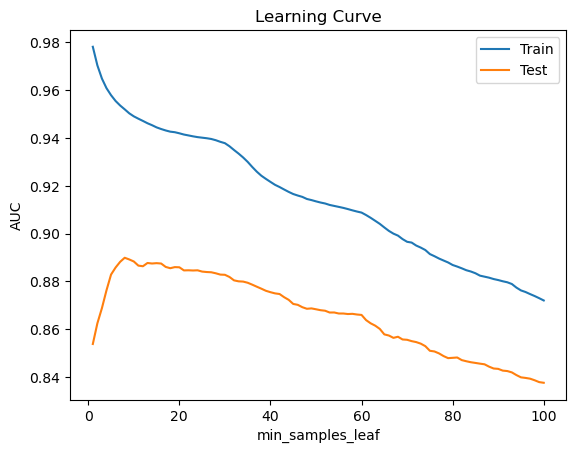

In [42]:
def draw_learning_curve_dt2(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model2 = DecisionTreeClassifier(min_samples_leaf=c)
        model2.fit(x2_train_dt, y2_train_dt)

        # eval on train
        y2_pred_train_proba_dt = model2.predict_proba(x2_train_dt)
        train_auc = roc_auc_score(y2_train_dt, y2_pred_train_proba_dt[:, 1])
        train_scores.append(train_auc)

        # eval on test
        y2_pred_proba_dt = model2.predict_proba(x2_test_dt)
        test_auc = roc_auc_score(y2_test_dt, y2_pred_proba_dt[:, 1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()


param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve_dt2(param_values)


## Fitur Importance

In [43]:
def show_feature_importance_dt2(model2):
    feat_importances = pd.Series(
        model2.feature_importances_, index=x2_dt.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')


def show_best_hyperparameter_dt2(model2):
    print(model2.best_estimator_.get_params())


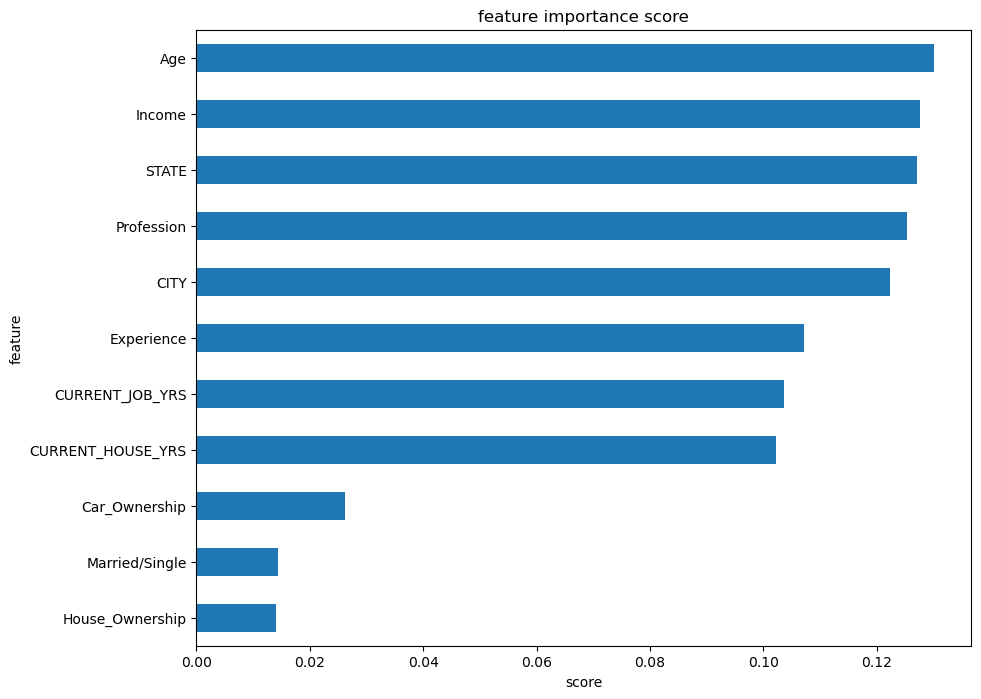

In [44]:
show_feature_importance_dt2(model2.best_estimator_)